# Prediction of Order Return

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TrainingData_V1.csv')
test = pd.read_excel('TestingData_For_Candidate.xlsx')

In [3]:
from sklearn.model_selection import train_test_split
xd,xh,yd,yh = train_test_split(data.drop('return',axis =1),data['return'], test_size= 0.2, random_state = 42)

In [4]:
data = pd.concat([xd,yd], axis =1)
holdout = pd.concat([xh,yh], axis =1)

In [5]:
data

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
37802,78327,23-08-2016,27-08-2016,1589,m,red,11,69.9,39141,Mrs,23-06-1973,1008,17-02-2015,1
12047,20598,30-06-2016,04-07-2016,204,xxl,brown,5,59.9,19171,Mrs,NaN,1005,14-05-2016,0
78024,80268,25-08-2016,29-10-2016,1498,40,green,6,59.9,10604,Mrs,15-04-1965,1008,24-06-2015,0
22392,24678,02-07-2016,03-07-2016,1372,22,beige,6,34.9,28419,Mrs,27-12-1967,1015,17-02-2015,1
51584,15011,29-06-2016,03-07-2016,884,39,nature,18,80.0,33376,Mrs,NaN,1002,30-06-2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,62610,10-08-2016,13-08-2016,1444,18,black,113,59.9,4430,Mrs,13-07-1959,1001,08-04-2016,1
54886,47635,01-08-2016,06-08-2016,185,40,brown,11,44.9,14398,Mrs,22-04-1975,1014,29-04-2016,1
76820,68470,13-08-2016,15-08-2016,546,l,grey,3,59.9,42626,Mrs,02-01-1975,1013,17-02-2015,1
860,8697,27-06-2016,NaN,321,39,red,23,64.9,32344,Mrs,02-01-1943,1011,03-11-2015,0


user_title,Company,Family,Mr,Mrs,not reported
return,,,,,
0,32,173,1426,32926,52
1,56,101,1094,28072,24


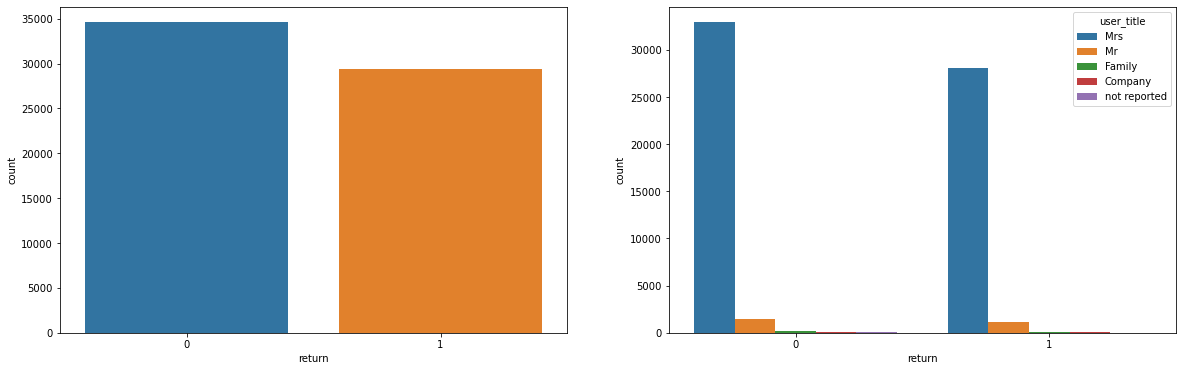

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data['return'])
plt.subplot(122)
sns.countplot(data['return'], hue= data.user_title )
pd.crosstab(index = data['return'],columns= data.user_title)

In [7]:
data.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return'],
      dtype='object')

In [8]:
for i in data.columns[[0,3,6,8,11]]:
    print(i,len(data[i].unique()))

order_item_id 63956
item_id 1867
brand_id 134
user_id 17255
user_state 16


Order_item_id do not provide any info, they are like serial no.'s. So, it's safe to remove this column.

In [9]:
data.drop('order_item_id', axis =1, inplace = True)

In [10]:
data

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
37802,23-08-2016,27-08-2016,1589,m,red,11,69.9,39141,Mrs,23-06-1973,1008,17-02-2015,1
12047,30-06-2016,04-07-2016,204,xxl,brown,5,59.9,19171,Mrs,NaN,1005,14-05-2016,0
78024,25-08-2016,29-10-2016,1498,40,green,6,59.9,10604,Mrs,15-04-1965,1008,24-06-2015,0
22392,02-07-2016,03-07-2016,1372,22,beige,6,34.9,28419,Mrs,27-12-1967,1015,17-02-2015,1
51584,29-06-2016,03-07-2016,884,39,nature,18,80.0,33376,Mrs,NaN,1002,30-06-2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10-08-2016,13-08-2016,1444,18,black,113,59.9,4430,Mrs,13-07-1959,1001,08-04-2016,1
54886,01-08-2016,06-08-2016,185,40,brown,11,44.9,14398,Mrs,22-04-1975,1014,29-04-2016,1
76820,13-08-2016,15-08-2016,546,l,grey,3,59.9,42626,Mrs,02-01-1975,1013,17-02-2015,1
860,27-06-2016,NaN,321,39,red,23,64.9,32344,Mrs,02-01-1943,1011,03-11-2015,0


In [11]:
data.dtypes

order_date        object
delivery_date     object
item_id            int64
item_size         object
item_color        object
brand_id           int64
item_price       float64
user_id            int64
user_title        object
user_dob          object
user_state         int64
user_reg_date     object
return             int64
dtype: object

Chnaging Data Type Of Dates

In [12]:
for i in data.columns[[0,1,9,11]]:
    data[i] = data[i].astype(np.datetime64)

In [13]:
data.dtypes

order_date       datetime64[ns]
delivery_date    datetime64[ns]
item_id                   int64
item_size                object
item_color               object
brand_id                  int64
item_price              float64
user_id                   int64
user_title               object
user_dob         datetime64[ns]
user_state                int64
user_reg_date    datetime64[ns]
return                    int64
dtype: object

In [14]:
data.head(10)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
37802,2016-08-23,2016-08-27,1589,m,red,11,69.90,39141,Mrs,1973-06-23,1008,2015-02-17,1
12047,2016-06-30,2016-04-07,204,xxl,brown,5,59.90,19171,Mrs,NaT,1005,2016-05-14,0
78024,2016-08-25,2016-10-29,1498,40,green,6,59.90,10604,Mrs,1965-04-15,1008,2015-06-24,0
22392,2016-02-07,2016-03-07,1372,22,beige,6,34.90,28419,Mrs,1967-12-27,1015,2015-02-17,1
51584,2016-06-29,2016-03-07,884,39,nature,18,80.00,33376,Mrs,NaT,1002,2016-06-30,0
39359,2016-05-09,2016-10-26,1489,xxl,aubergine,37,29.90,29015,Mrs,1966-12-15,1002,2016-06-09,1
78301,2016-08-27,2016-10-09,1517,46,grey,6,69.90,42213,Mrs,1979-06-02,1007,2016-08-13,1
62346,2016-01-07,2016-03-07,115,48,blue,25,69.90,12811,Mrs,1965-09-13,1007,2015-10-11,1
58821,2016-08-30,2016-08-30,204,l,brown,5,39.90,2392,Mrs,1964-04-20,1011,2016-04-04,1
16355,2016-10-08,2016-08-14,615,128,purple,30,49.95,41836,Mr,NaT,1015,2016-11-08,0


In [15]:
Time_Taken = data.delivery_date - data.order_date
Time_Taken

37802      4 days
12047    -84 days
78024     65 days
22392     29 days
51584   -114 days
           ...   
6265     -56 days
54886    152 days
76820      2 days
860           NaT
15795     62 days
Length: 63956, dtype: timedelta64[ns]

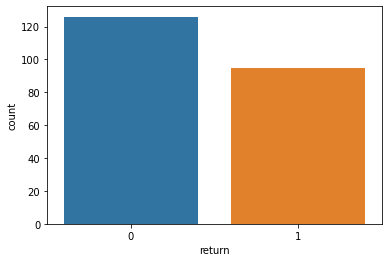

In [16]:
sns.countplot(data[Time_Taken == np.timedelta64(0,'D')]['return'])

In [17]:
s1 = pd.DataFrame(data[Time_Taken < np.timedelta64(0,'D')]['return'])
s2 = pd.DataFrame(data[Time_Taken >= np.timedelta64(0,'D')]['return'])

In [18]:
k1 = Time_Taken[Time_Taken < np.timedelta64(0,'D')]
k2 = Time_Taken[Time_Taken >= np.timedelta64(0,'D')]

In [19]:
k1 = k1.dt.days.astype('int64')
k2 = k2.dt.days.astype('int64')

In [20]:
s1['Duration'] = k1
s2['Duration'] = k2

Plot showing pattern of returns with a negative duration and positive duration of delievery

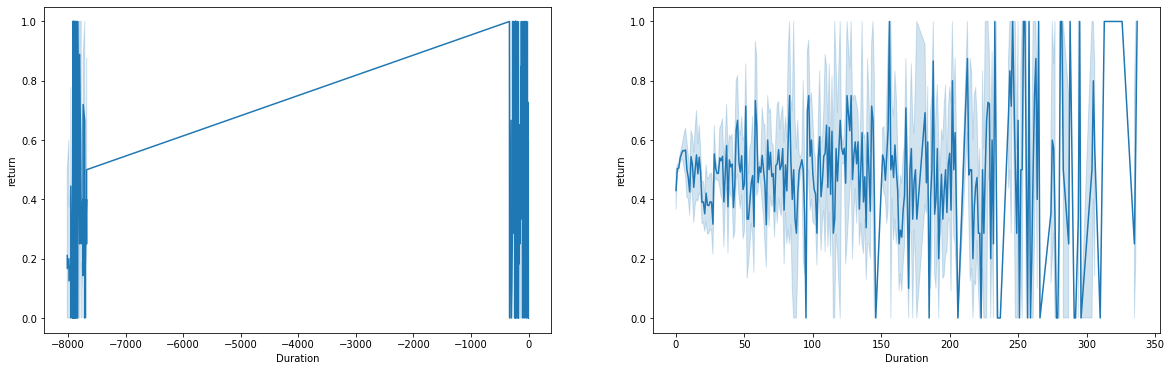

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.lineplot(data = s1, x = 'Duration', y = 'return')
plt.subplot(122)
sns.lineplot(data = s2, x = 'Duration', y = 'return')

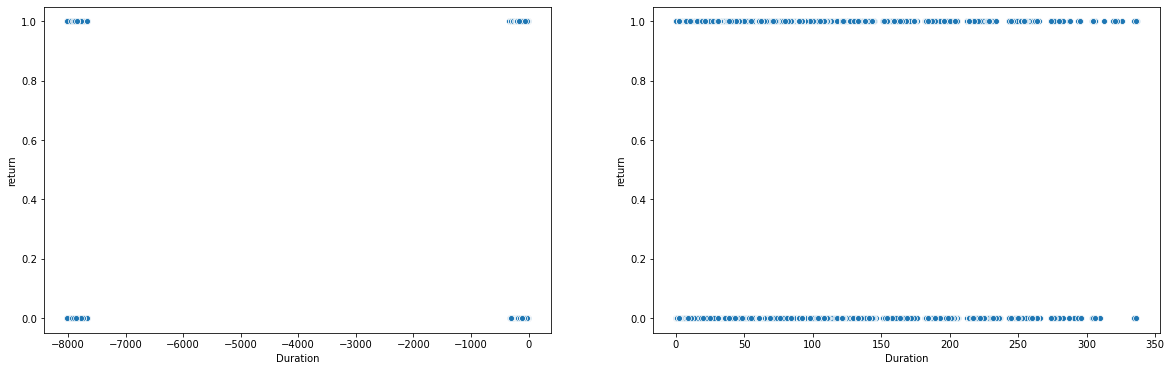

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.scatterplot(data = s1, x = 'Duration', y = 'return')
plt.subplot(122)
sns.scatterplot(data = s2, x = 'Duration', y = 'return')

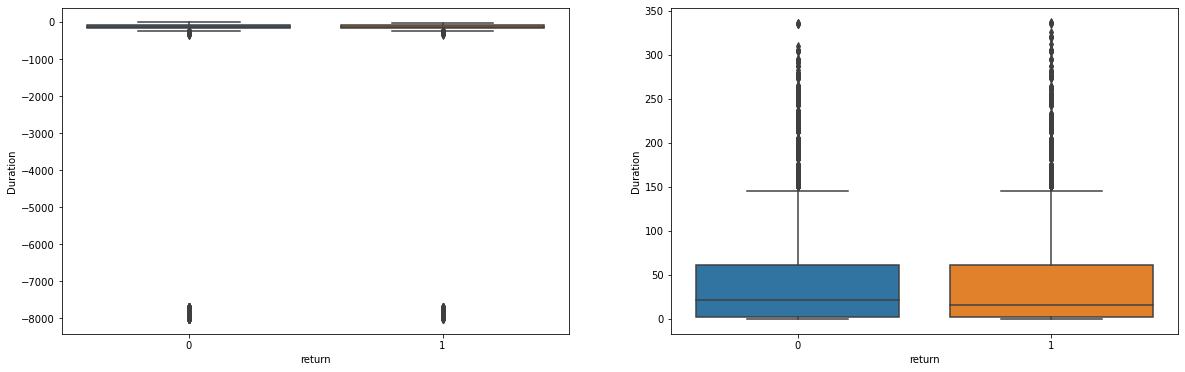

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.boxplot(data = s1, y = 'Duration', x = 'return')
plt.subplot(122)
sns.boxplot(data = s2, y = 'Duration', x = 'return')

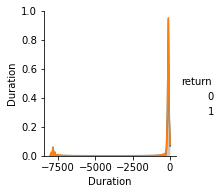

In [24]:
sns.pairplot(s1, hue = 'return')

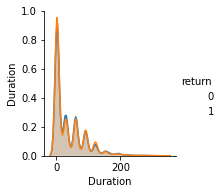

In [25]:
sns.pairplot(s2, hue = 'return')

In [26]:
data

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
37802,2016-08-23,2016-08-27,1589,m,red,11,69.9,39141,Mrs,1973-06-23,1008,2015-02-17,1
12047,2016-06-30,2016-04-07,204,xxl,brown,5,59.9,19171,Mrs,NaT,1005,2016-05-14,0
78024,2016-08-25,2016-10-29,1498,40,green,6,59.9,10604,Mrs,1965-04-15,1008,2015-06-24,0
22392,2016-02-07,2016-03-07,1372,22,beige,6,34.9,28419,Mrs,1967-12-27,1015,2015-02-17,1
51584,2016-06-29,2016-03-07,884,39,nature,18,80.0,33376,Mrs,NaT,1002,2016-06-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2016-10-08,2016-08-13,1444,18,black,113,59.9,4430,Mrs,1959-07-13,1001,2016-08-04,1
54886,2016-01-08,2016-06-08,185,40,brown,11,44.9,14398,Mrs,1975-04-22,1014,2016-04-29,1
76820,2016-08-13,2016-08-15,546,l,grey,3,59.9,42626,Mrs,1975-02-01,1013,2015-02-17,1
860,2016-06-27,NaT,321,39,red,23,64.9,32344,Mrs,1943-02-01,1011,2015-03-11,0


In [27]:
data['Time_Taken'] = data.delivery_date - data.order_date

In [28]:
data[data.Time_Taken.isna()]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Time_Taken
51621,2016-06-29,NaT,31,41,red,22,19.90,33417,Mrs,1966-03-23,1001,2016-06-30,0,NaT
64017,2016-07-20,NaT,1104,unsized,yellow,48,34.95,17939,Mrs,1965-03-08,1001,2015-02-17,0,NaT
4997,2016-03-08,NaT,100,42,petrol,43,69.90,3650,Mrs,1961-12-24,1001,2015-02-17,0,NaT
72502,2016-02-07,NaT,175,l,black,3,16.90,12985,Mrs,1956-07-27,1002,2016-05-03,0,NaT
22519,2016-03-07,NaT,32,l,azure,3,9.40,29733,Mrs,1959-06-05,1013,2015-02-17,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19457,2016-06-09,NaT,1834,31,grey,48,44.95,11280,Mrs,1966-11-12,1010,2016-04-21,0,NaT
43001,2016-05-07,NaT,375,43,brown,13,49.90,33732,Mrs,1972-11-17,1008,2015-02-17,0,NaT
67221,2016-08-17,NaT,391,6,grey,48,39.90,43223,Mrs,1960-02-28,1007,2015-05-27,0,NaT
41090,2016-06-27,NaT,271,m,black,5,29.90,6916,Mrs,1968-04-16,1010,2016-10-02,0,NaT


In [29]:
data.Time_Taken.fillna(pd.Timedelta(days = 12345), inplace = True)

Deriving the feature 'abs_TT' that show how much time is taken for delievery

In [30]:
data['abs_TT'] = data.Time_Taken.dt.days.astype('int64')

In [31]:
data.abs_TT.replace(12345,np.nan, inplace= True)

Deriving the feature 'TT_REG_OR' that show how much time is between user registration and its order 

In [32]:
TT_REG_OR = data.order_date - data.user_reg_date

In [33]:
data['TT_REG_OR'] = TT_REG_OR.dt.days.astype('int64')

The plot tells us that, the orders with no delievery date, has 100% non-return rate. This lead us to assumption that they might not get delievered. Therefore, we make a new column name 'Delievered'.

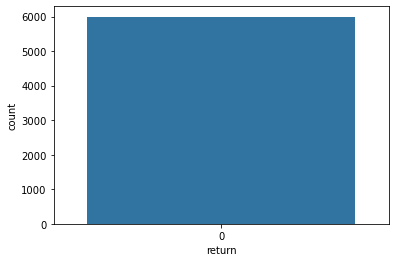

In [34]:
sns.countplot(data[data.abs_TT.isnull()]['return'])

We have observed that the rows with no Delievery date have all the return values as 0, it might be the case that they have not delievered yet, so we are making a column name delievered for this.

In [35]:
data['Delievered'] = 1

In [36]:
data['Delievered'][data.abs_TT.isna()] = 0

<ipython-input-36-82e109b8b636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delievered'][data.abs_TT.isna()] = 0


We derive the Age of the user at the time of order

In [37]:
data['Age'] = data.order_date - data.user_dob

In [38]:
data['Age'] = data['Age']/np.timedelta64(1,'Y')

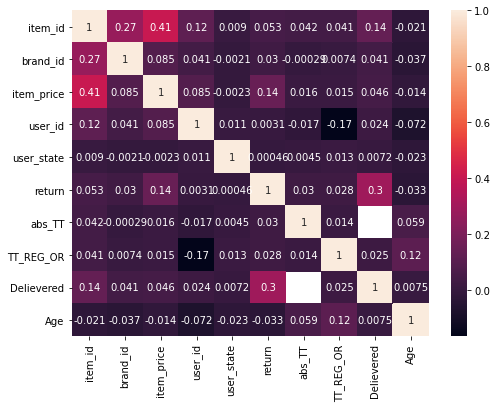

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot= True)

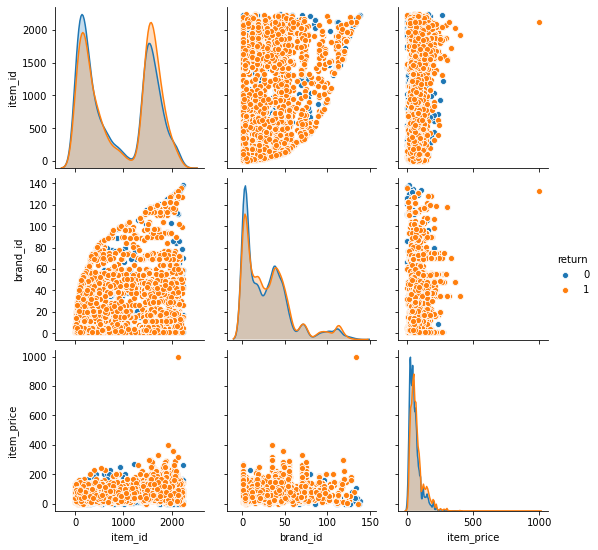

In [40]:
sns.pairplot(data[['item_id','brand_id','return','item_price']], hue = 'return')

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,63956,922.953,702.7,1,214,808,1582,2241
brand_id,63956,30.0832,28.1693,1,5,25,44,138
item_price,63956,65.0361,47.7473,0,29.9,49.9,79.9,999
user_id,63956,27217.8,14068,9,14965,31211,39006,48241
user_state,63956,1007.27,4.2831,1001,1002,1008,1010,1016
return,63956,0.458862,0.498309,0,0,0,1,1
Time_Taken,63956,1077 days 23:03:29.168802,3712 days 22:41:47.677657,-8013 days +00:00:00,1 days 00:00:00,4 days 00:00:00,61 days 00:00:00,12345 days 00:00:00
abs_TT,57962,-87.1929,852.038,-8013,1,3,60,337
TT_REG_OR,63956,250.708,233.283,-334,-1,243,496,700
Delievered,63956,0.906279,0.291442,0,1,1,1,1


In [42]:
data.isnull().sum()

order_date          0
delivery_date    5994
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         5583
user_state          0
user_reg_date       0
return              0
Time_Taken          0
abs_TT           5994
TT_REG_OR           0
Delievered          0
Age              5583
dtype: int64

In [43]:
data.nunique()

order_date          82
delivery_date      119
item_id           1867
item_size          100
item_color          77
brand_id           134
item_price         242
user_id          17255
user_title           5
user_dob          8714
user_state          16
user_reg_date      571
return               2
Time_Taken         562
abs_TT             561
TT_REG_OR          872
Delievered           2
Age              10443
dtype: int64

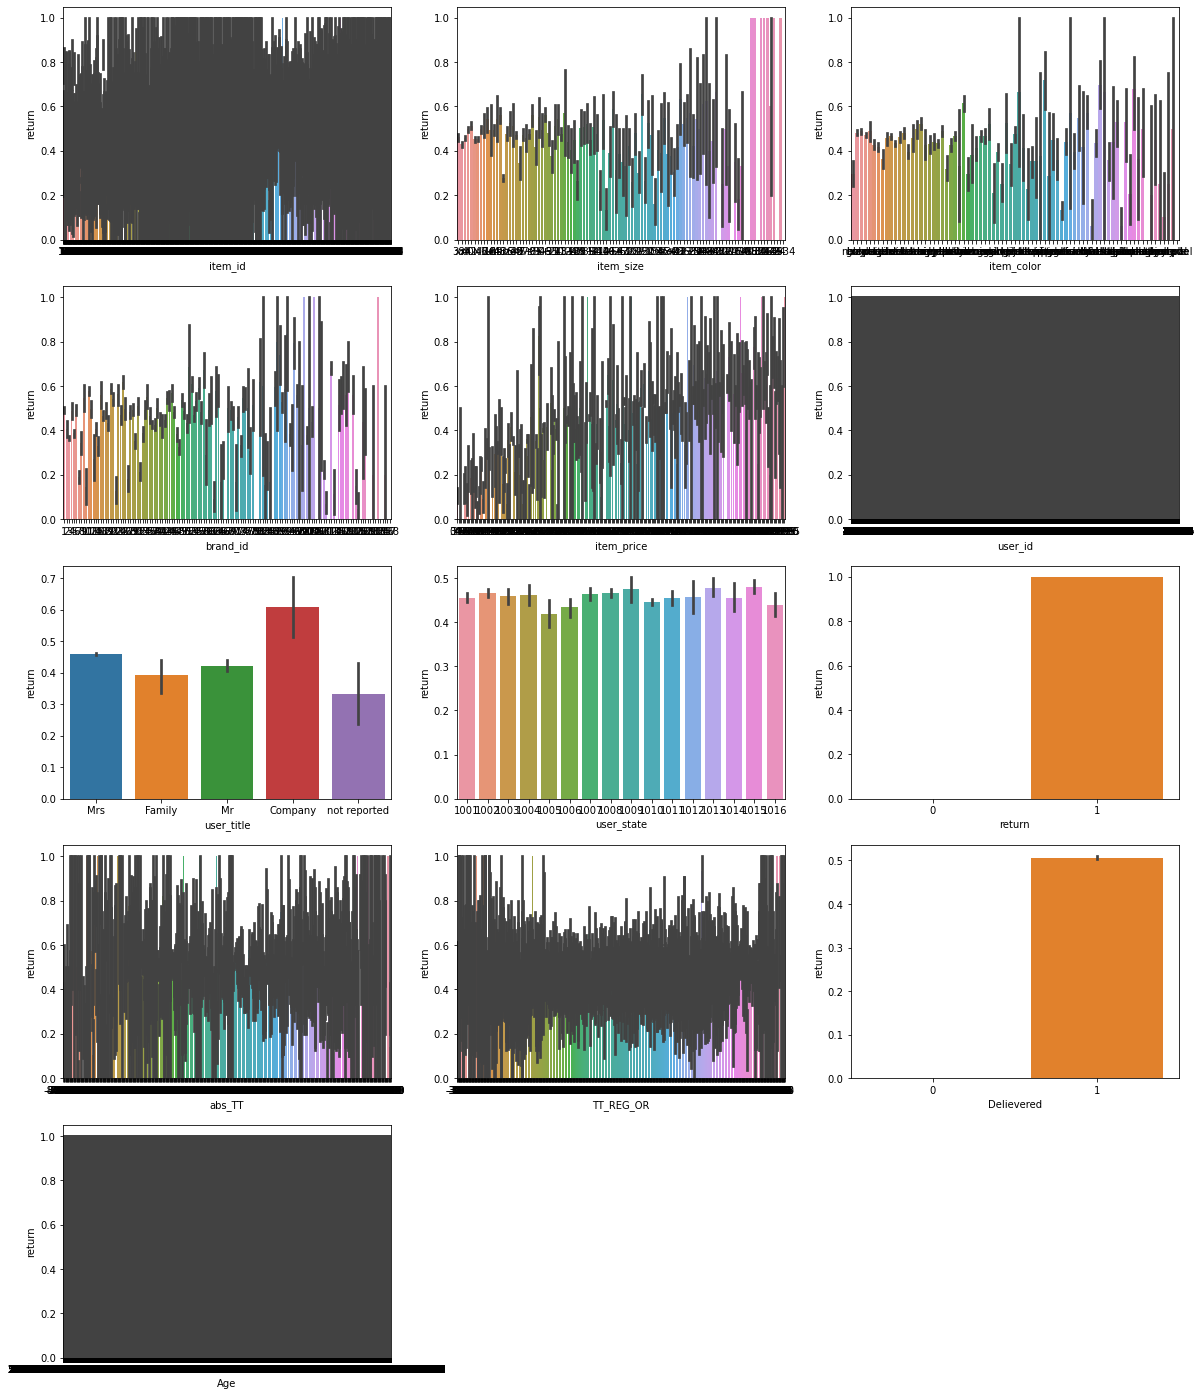

In [228]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.columns:
    plt.subplot(6,3,plotnumber)
    sns.barplot(x = str(i) , y = 'return', data = data)
    plotnumber += 1

Giving ranks to the User Title according to their return rate.

In [44]:
data['user_title'] = data['user_title'].map({'not reported':0,'Family':1,'Mr':2,'Mrs':3,'Company':4})

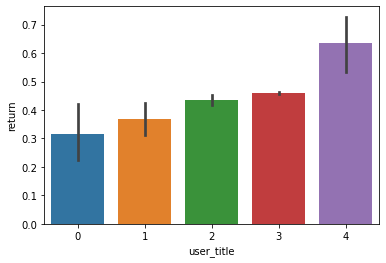

In [45]:
sns.barplot(data['user_title'],data['return'])

In [46]:
data.item_size.unique()

array(['m', 'xxl', '40', '22', '39', '46', '48', 'l', '128', '38+', '38',
       '8+', '41', '42', '6+', 's', '40+', '116', '10', '43', 'xl', '19',
       'unsized', '21', '35', '5', '36', '44', '27', '37', '18', '6',
       '11', '45+', '9', '31', '7', '47', '45', 'xs', '58', '10+', '9+',
       '23', '140', '152', '24', '5+', '8', '4+', '4', 'xxxl', '7+', '34',
       '41+', '30', '20', '42+', '54', '25', '33', '52', '29', '37+',
       '50', '11+', '39+', '13', '2', '12', '104', '44+', '32', '28',
       '14', '3432', '3332', '46+', '26', '4032', '1', '164', '56', '100',
       '3', '43+', '90', '3632', '49', '4034', '3832', '36+', '3+', '84',
       '105', '3634', '3132', '3834', '176', '2+'], dtype=object)

In [47]:
data.item_color.unique()

array(['red', 'brown', 'green', 'beige', 'nature', 'aubergine', 'grey',
       'blue', 'purple', 'black', 'ocher', 'fuchsia', 'stained',
       'dark denim', 'anthracite', 'ash', 'mahagoni', 'yellow', 'petrol',
       'white', 'azure', 'curry', 'pink', 'olive', 'berry', 'mocca',
       'navy', 'mango', 'denim', 'striped', 'magenta', 'jade', '?',
       'turquoise', 'ancient', 'floral', 'ecru', 'bordeaux', 'pallid',
       'aquamarine', 'champagner', 'orange', 'khaki', 'dark navy',
       'basalt', 'silver', 'cognac', 'hibiscus', 'mint', 'dark grey',
       'kanel', 'ivory', 'blau', 'antique pink', 'habana', 'coral',
       'darkblue', 'dark oliv', 'ebony', 'dark garnet', 'aqua',
       'terracotta', 'cobalt blue', 'gold', 'baltic blue', 'brwon',
       'almond', 'aviator', 'apricot', 'copper coin', 'currant purple',
       'amethyst', 'opal', 'creme', 'curled', 'caramel', 'avocado'],
      dtype=object)

In [48]:
col = {}
for i in data.item_color.unique():
    col[i] = (len(data[(data.item_color == i) & (data['return'] == 1)])/len(data[(data.item_color == i)]))

In [49]:
siz = {}
for i in data.item_size.unique():
    siz[i] = (len(data[(data.item_size == i) & (data['return'] == 1)])/len(data[(data.item_size == i)]))

In [50]:
use = {}
for i in data.user_id.unique():
    use[i] = (len(data[(data.user_id == i) & (data['return'] == 1)])/len(data[(data.user_id == i)]))

In [51]:
ite = {}
for i in data.item_id.unique():
    ite[i] = (len(data[(data.item_id == i) & (data['return'] == 1)])/len(data[(data.item_id == i)]))

Deriving new featutre showing their respective return rate

In [52]:
data['color'] = data['item_color'].map(col)
data['size'] = data['item_size'].map(siz)
data['user_return_rate'] = data['user_id'].map(use)
data['item_return_rate'] = data['item_id'].map(ite)

Label Encoding Size and Color variable

In [53]:
from sklearn.preprocessing import LabelEncoder
itsz = LabelEncoder()
itco = LabelEncoder()
data['lsize'] = itsz.fit_transform(data.item_size)
data['lcolor'] = itco.fit_transform(data.item_color)

Some of the rows have item price 0, which can't be possible.So we try to predict them using Model.

In [54]:
data0 = data[data['item_price'] == 0] 
data1 = data[data['item_price'] !=0] 

In [55]:
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data1[['item_id','brand_id','user_state','lcolor']],data1[['item_price']],test_size=0.2, random_state= 42)

for i in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor()]:#,SVR()]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

LinearRegression()  score:  0.1836804677870585 

DecisionTreeRegressor()  score:  0.9592183013015972 



<ipython-input-55-877341fc1523>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


RandomForestRegressor()  score:  0.9664177934196173 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)  score:  0.949170196685077 

KNeighborsRegressor()  score:  0.9162555165906845 



In [56]:
data[data.item_price == 0]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,...,abs_TT,TT_REG_OR,Delievered,Age,color,size,user_return_rate,item_return_rate,lsize,lcolor
17703,2016-08-22,2016-09-19,1904,unsized,?,125,0.0,28353,3,1968-01-01,...,28.0,288,1,48.641656,0.052632,0.281079,0.166667,0.000000,95,0
56337,2016-10-08,2016-08-13,1904,unsized,?,125,0.0,41577,3,1970-02-21,...,-56.0,511,1,46.629294,0.052632,0.281079,0.000000,0.000000,95,0
63236,2016-09-07,NaT,62,unsized,white,5,0.0,11062,3,1979-05-14,...,NaN,398,0,37.320410,0.420723,0.281079,0.714286,0.172727,95,75
46318,2016-10-08,2016-03-09,1472,unsized,brown,60,0.0,12106,2,1969-12-26,...,-213.0,167,1,46.785355,0.491166,0.281079,0.000000,0.200000,95,22
72844,2016-04-07,2016-07-23,62,unsized,white,5,0.0,35544,3,1972-03-13,...,107.0,415,1,44.069351,0.420723,0.281079,0.600000,0.172727,95,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67675,2016-08-21,2016-08-22,1436,unsized,pallid,111,0.0,36683,3,1981-06-23,...,1.0,39,1,35.162940,0.128631,0.281079,0.666667,0.062500,95,65
69724,2016-07-09,2016-10-09,1472,unsized,brown,60,0.0,42001,3,1986-08-13,...,92.0,261,1,29.906158,0.491166,0.281079,0.000000,0.200000,95,22
77052,2016-08-15,2016-07-09,2121,unsized,orange,126,0.0,42998,3,1958-04-19,...,-37.0,377,1,58.325633,0.393782,0.281079,0.000000,0.000000,95,64
32745,2016-04-07,NaT,157,unsized,purple,32,0.0,24682,3,1970-05-24,...,NaN,415,0,45.873632,0.416732,0.281079,0.000000,0.184397,95,68


In [57]:
data.item_price.replace(0.0,np.nan, inplace= True)

In [58]:
item_price_prdictor = RandomForestRegressor()
item_price_prdictor.fit(data[data.item_price.notnull()][['item_id','brand_id','user_state','lcolor']],data[data.item_price.notnull()]['item_price'] )

RandomForestRegressor()

In [59]:
prediction =  item_price_prdictor.predict(data[data.item_price.isnull()][['item_id','brand_id','user_state','lcolor']])

In [60]:
data.item_price[data.item_price.isnull()].index

Int64Index([17703, 56337, 63236, 46318, 72844, 36910, 19379, 12890, 22545,
             7579,
            ...
            30447, 44638, 66504, 52307, 37567, 67675, 69724, 77052, 32745,
            70091],
           dtype='int64', length=242)

In [61]:
i = 0
for j in data.item_price[data.item_price.isnull()].index:
    data.item_price.loc[j] = prediction[i]
    i += 1

C:\Users\Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
data.isnull().sum()

order_date             0
delivery_date       5994
item_id                0
item_size              0
item_color             0
brand_id               0
item_price             0
user_id                0
user_title             0
user_dob            5583
user_state             0
user_reg_date          0
return                 0
Time_Taken             0
abs_TT              5994
TT_REG_OR              0
Delievered             0
Age                 5583
color                  0
size                   0
user_return_rate       0
item_return_rate       0
lsize                  0
lcolor                 0
dtype: int64

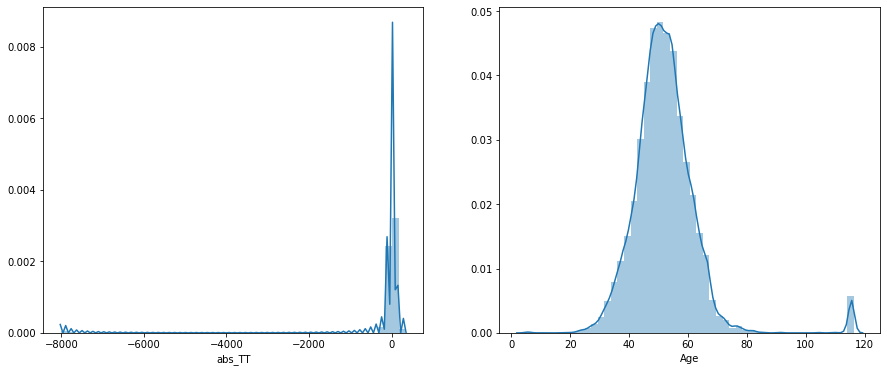

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(data.abs_TT)
plt.subplot(122)
sns.distplot(data.Age)

Deliervery date can't be earlier than order date, so we make the time taken column absolute.

In [64]:
data['abs_TT'] = data.abs_TT.abs()
data['abs_reg_or'] = data.TT_REG_OR.abs()

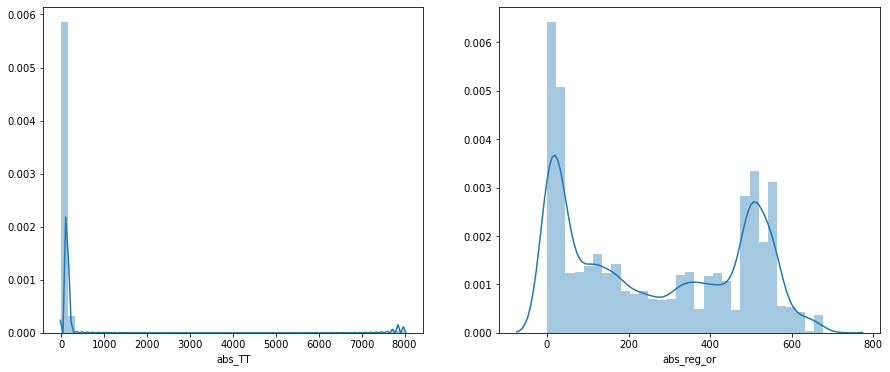

In [65]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(data.abs_TT)
plt.subplot(122)
sns.distplot(data.abs_reg_or)

In [66]:
data[data.abs_TT > data.abs_TT.quantile(0.95)]['abs_TT'].sort_values()

18825     175.0
58903     175.0
8805      175.0
8762      175.0
59015     175.0
          ...  
66704    8013.0
46561    8013.0
26501    8013.0
56597    8013.0
66732    8013.0
Name: abs_TT, Length: 2657, dtype: float64

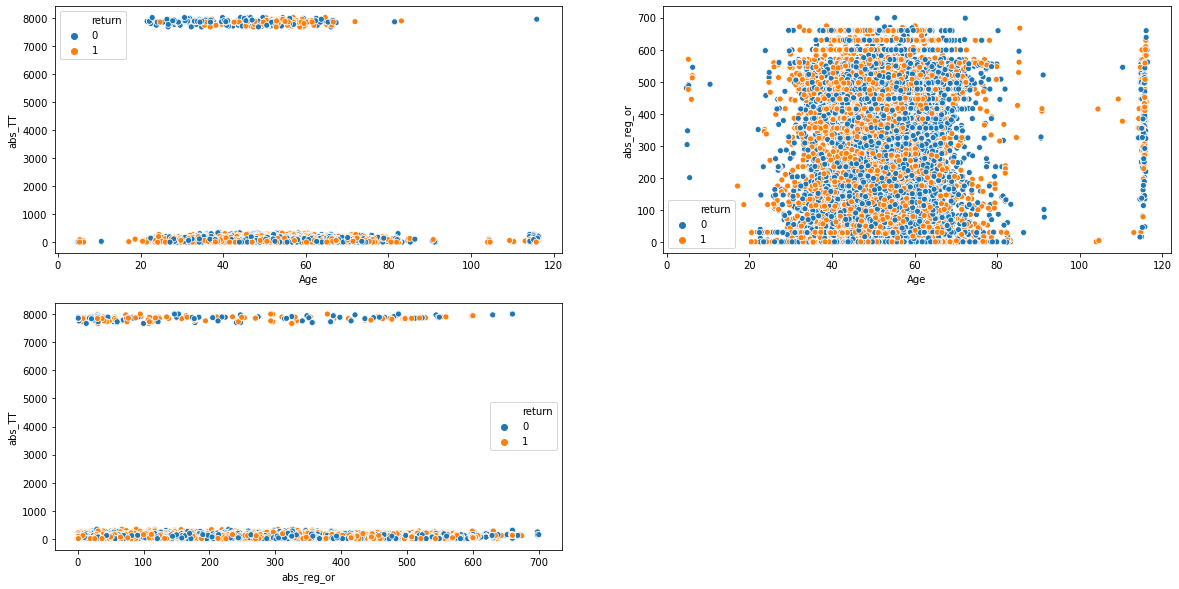

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.scatterplot(data.Age,data.abs_TT,hue = data['return'] )
plt.subplot(222)
sns.scatterplot(data.Age,data.abs_reg_or,hue = data['return'] )
plt.subplot(223)
sns.scatterplot(data.abs_reg_or,data.abs_TT,hue = data['return'] )


In [68]:
print(data.abs_TT.quantile(0.985))
print(data.Age.quantile(0.9866))
data.Age.quantile(0.0004)

250.0
90.83250497956833


12.82786532235433

Replacing the Outlier Values with the Reasonable Extreme Values

In [69]:
data.abs_TT.replace(data[data.abs_TT > 249]['abs_TT'],249, inplace = True)
data.Age.replace(data[data.Age > 88]['Age'],88, inplace = True)
data.Age.replace(data[data.Age < 18]['Age'],18,inplace = True)

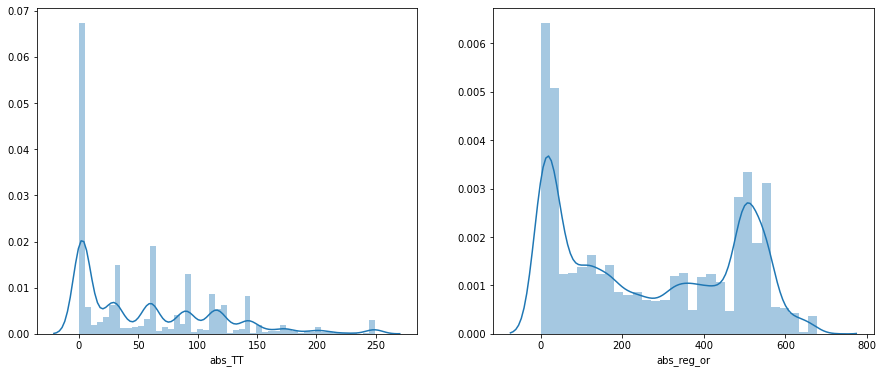

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(data.abs_TT)
plt.subplot(122)
sns.distplot(data.abs_reg_or)

In [71]:
print(data.abs_TT.mode()[0])
print(data.Age.median())

2.0
51.3877766141673


In [72]:
data.isnull().sum()

order_date             0
delivery_date       5994
item_id                0
item_size              0
item_color             0
brand_id               0
item_price             0
user_id                0
user_title             0
user_dob            5583
user_state             0
user_reg_date          0
return                 0
Time_Taken             0
abs_TT              5994
TT_REG_OR              0
Delievered             0
Age                 5583
color                  0
size                   0
user_return_rate       0
item_return_rate       0
lsize                  0
lcolor                 0
abs_reg_or             0
dtype: int64

Replacing null values with measure of Central Tendency

In [73]:
data.abs_TT.replace( data[data.abs_TT.isnull()]['abs_TT'],data.abs_TT.mode()[0], inplace = True)

In [74]:
data.Age.replace(np.nan, data.Age.median(), inplace = True)

Deriving new feature 'Repeat Purchase', which indicate user how many times a user has made repeat purchase

In [75]:
data['Repeat_Purchase'] = 0

In [76]:
for i in  range(len(data)):
    item = data.item_id.iloc[i]
    user = data.user_id.iloc[i]
    data.Repeat_Purchase.iloc[i] = len(data[(data.item_id == item) & (data.user_id == user)]) - 1

C:\Users\Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
data.user_state.unique()

array([1008, 1005, 1015, 1002, 1007, 1011, 1010, 1013, 1001, 1006, 1003,
       1014, 1012, 1009, 1004, 1016], dtype=int64)

Changing the Origin of User State Variable

In [78]:
data['user_state'] = data.user_state - 1000

In [79]:
data

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,...,Delievered,Age,color,size,user_return_rate,item_return_rate,lsize,lcolor,abs_reg_or,Repeat_Purchase
37802,2016-08-23,2016-08-27,1589,m,red,11,69.9,39141,3,1973-06-23,...,1,43.168580,0.430275,0.457099,0.800000,0.575758,93,69,553,0
12047,2016-06-30,2016-04-07,204,xxl,brown,5,59.9,19171,3,NaT,...,1,51.387777,0.491166,0.427776,0.000000,0.376623,98,22,47,2
78024,2016-08-25,2016-10-29,1498,40,green,6,59.9,10604,3,1965-04-15,...,1,51.363135,0.436273,0.496578,0.250000,0.395522,56,46,428,0
22392,2016-02-07,2016-03-07,1372,22,beige,6,34.9,28419,3,1967-12-27,...,1,48.115978,0.444874,0.645570,0.818182,0.791667,23,16,355,1
51584,2016-06-29,2016-03-07,884,39,nature,18,80.0,33376,3,NaT,...,1,51.387777,0.502804,0.474825,0.000000,0.142857,52,59,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2016-10-08,2016-08-13,1444,18,black,113,59.9,4430,3,1959-07-13,...,1,57.241422,0.469448,0.482759,0.166667,0.585366,17,18,65,1
54886,2016-01-08,2016-06-08,185,40,brown,11,44.9,14398,3,1975-04-22,...,1,40.715415,0.491166,0.496578,1.000000,0.666667,56,22,112,0
76820,2016-08-13,2016-08-15,546,l,grey,3,59.9,42626,3,1975-02-01,...,1,41.531311,0.480780,0.455077,0.166667,0.574468,92,47,543,0
860,2016-06-27,NaT,321,39,red,23,64.9,32344,3,1943-02-01,...,0,73.403287,0.430275,0.474825,0.000000,0.388889,52,69,474,0


In [80]:
data.columns

Index(['order_date', 'delivery_date', 'item_id', 'item_size', 'item_color',
       'brand_id', 'item_price', 'user_id', 'user_title', 'user_dob',
       'user_state', 'user_reg_date', 'return', 'Time_Taken', 'abs_TT',
       'TT_REG_OR', 'Delievered', 'Age', 'color', 'size', 'user_return_rate',
       'item_return_rate', 'lsize', 'lcolor', 'abs_reg_or', 'Repeat_Purchase'],
      dtype='object')

In [81]:
X = data[['item_price','user_state','abs_TT','abs_reg_or','Delievered','Age','item_return_rate','user_return_rate','Repeat_Purchase']]
Y = data['return']

In [82]:
X

,item_price,user_state,abs_TT,abs_reg_or,Delievered,Age,item_return_rate,user_return_rate,Repeat_Purchase
37802,69.9,8,4.0,553,1,43.168580,0.575758,0.800000,0
12047,59.9,5,84.0,47,1,51.387777,0.376623,0.000000,2
78024,59.9,8,65.0,428,1,51.363135,0.395522,0.250000,0
22392,34.9,15,29.0,355,1,48.115978,0.791667,0.818182,1
51584,80.0,2,114.0,1,1,51.387777,0.142857,0.000000,0
...,...,...,...,...,...,...,...,...,...
6265,59.9,1,56.0,65,1,57.241422,0.585366,0.166667,1
54886,44.9,14,152.0,112,1,40.715415,0.666667,1.000000,0
76820,59.9,13,2.0,543,1,41.531311,0.574468,0.166667,0
860,64.9,11,2.0,474,0,73.403287,0.388889,0.000000,0


In [83]:
# Test to check the equality of variance
import scipy.stats as stats
for i in ['item_price','abs_TT','abs_reg_or','Age','user_return_rate','item_return_rate']:
    print(i,': ',stats.levene(X[i][Y == 0],X[i][Y == 1]))

item_price :  LeveneResult(statistic=266.22626059269885, pvalue=9.96078636159878e-60)
abs_TT :  LeveneResult(statistic=86.67412201980385, pvalue=1.3185901841998432e-20)
abs_reg_or :  LeveneResult(statistic=33.04895562606785, pvalue=9.02747263611785e-09)
Age :  LeveneResult(statistic=1.2827874993832422, pvalue=0.2573856358378461)
user_return_rate :  LeveneResult(statistic=359.4168417602545, pvalue=6.255612183032443e-80)
item_return_rate :  LeveneResult(statistic=363.9700257363478, pvalue=6.462720880174868e-81)


In [84]:
# To test the Equality of means
import scipy.stats as stats
for i in ['item_price','abs_TT','abs_reg_or','Age','user_return_rate','item_return_rate']:
    print(i,': ',stats.f_oneway(X[i][Y == 0],X[i][Y == 1]))

item_price :  F_onewayResult(statistic=1328.7063089939072, pvalue=5.96718238251405e-288)
abs_TT :  F_onewayResult(statistic=317.72007357474575, pvalue=6.751610860928544e-71)
abs_reg_or :  F_onewayResult(statistic=43.905212784611635, pvalue=3.4739354538541964e-11)
Age :  F_onewayResult(statistic=96.68502000072199, pvalue=8.436733322888839e-23)
user_return_rate :  F_onewayResult(statistic=44207.48575849779, pvalue=0.0)
item_return_rate :  F_onewayResult(statistic=7954.994874357375, pvalue=0.0)


In [85]:
# Chi-Square test for Checking of Independence of variables.
from scipy import stats
print("H0 : Assume there is no dependence between two variable")
print("H1 : Assume there is dependence between two variable")
var1 = []
var2 = []
chi2 = []
df = []
p = []
d = [] 
h = []
for i in ['user_state','Delievered','Repeat_Purchase']:
            cross_tab = pd.crosstab(X[str(i)],Y)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
            var1.append(i)
            var2.append('Return')
            chi2.append(chi2_stat)
            df.append(dof)
            p.append(p_val)
            if p_val > 0.05:
                d.append('Independent')
                h.append('Accepted')
            else:
                d.append('Dependent')
                h.append('Rejected')
a = pd.DataFrame([var1,var2,chi2,df,p,d,h],index=['variable 1','variable 2','Chi2 Value','DOF','P Value','Decison (5% LOS)','Null Hypothesis']).T
a

H0 : Assume there is no dependence between two variable
H1 : Assume there is dependence between two variable


,variable 1,variable 2,Chi2 Value,DOF,P Value,Decison (5% LOS),Null Hypothesis
0,user_state,Return,51.2279,15,7.57349e-06,Dependent,Rejected
1,Delievered,Return,5606.24,1,0,Dependent,Rejected
2,Repeat_Purchase,Return,184.056,14,9.72264e-32,Dependent,Rejected


In [86]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [87]:
X_scaled = scalar.fit_transform(X)
X_n = pd.DataFrame(X_scaled, columns= X.columns)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(X_n)

,variables,VIF
0,item_price,3.227379
1,user_state,2.929438
2,abs_TT,1.921098
3,abs_reg_or,2.613819
4,Delievered,10.212049
5,Age,8.921366
6,item_return_rate,9.998490
7,user_return_rate,3.346866
8,Repeat_Purchase,1.183484


In [89]:
holdout.drop('order_item_id', axis =1, inplace = True)

for i in holdout.columns[[0,1,9,11]]:
    holdout[i] = holdout[i].astype(np.datetime64)
    
holdout['Time_Taken'] = holdout.delivery_date - holdout.order_date
holdout.Time_Taken.fillna(pd.Timedelta(days = 12345), inplace = True)
holdout['abs_TT'] = holdout.Time_Taken.dt.days.astype('int64')
holdout.abs_TT.replace(12345,np.nan, inplace= True)


TT_REG_OR = holdout.order_date - holdout.user_reg_date
holdout['TT_REG_OR'] = TT_REG_OR.dt.days.astype('int64')


holdout['Delievered'] = 1
holdout['Delievered'][holdout.abs_TT.isna()] = 0

holdout['Age'] = data.order_date - data.user_dob
holdout['Age'] = holdout['Age']/np.timedelta64(1,'Y')

holdout['user_title'] = holdout['user_title'].map({'not reported':0,'Family':1,'Mr':2,'Mrs':3,'Company':4})

holdout['color'] = holdout['item_color'].map(col)
holdout['size'] = holdout['item_size'].map(siz)
holdout['user_return_rate'] = holdout['user_id'].map(use)
holdout['item_return_rate'] = holdout['item_id'].map(ite)
holdout.user_return_rate.fillna(data['user_return_rate'].mean(), inplace =True)
holdout.item_return_rate.fillna(data['item_return_rate'].mean(), inplace =True)
holdout.color.fillna(data['color'].mean(), inplace =True)
holdout['size'].fillna(data['size'].mean(), inplace =True)

holdout['lcolor'] = itco.transform(holdout.item_color)

holdout.item_price.replace(0.0,np.nan, inplace= True)

prediction =  item_price_prdictor.predict(holdout[holdout.item_price.isnull()][['item_id','brand_id','user_state','lcolor']])

i = 0
for j in holdout.item_price[holdout.item_price.isnull()].index:
    holdout.item_price.loc[j] = prediction[i]
    i += 1
    
holdout['abs_TT'] = holdout.abs_TT.abs()
holdout['abs_reg_or'] = holdout.TT_REG_OR.abs()


holdout.abs_TT.replace(holdout[holdout.abs_TT > 249]['abs_TT'],249, inplace = True)
holdout.Age.replace(holdout[holdout.Age > 88]['Age'],88, inplace = True)
holdout.Age.replace(holdout[holdout.Age < 18]['Age'],18,inplace = True)


holdout.abs_TT.replace( holdout[holdout.abs_TT.isnull()]['abs_TT'],data.abs_TT.mode()[0], inplace = True)
holdout.Age.replace(np.nan, data.Age.median(), inplace = True)


holdout['Repeat_Purchase'] = 0
for i in  range(len(holdout)):
    item = holdout.item_id.iloc[i]
    user = holdout.user_id.iloc[i]
    holdout.Repeat_Purchase.iloc[i] = len(data[(data.item_id == item) & (data.user_id == user)]) + len(holdout[(holdout.item_id == item) & (holdout.user_id == user)]) - 1
    
    
    holdout['user_state'] = holdout.user_state - 1000

<ipython-input-89-004f0307009a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holdout['Delievered'][holdout.abs_TT.isna()] = 0
C:\Users\Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
x_train = data[['item_price','user_state','abs_TT','abs_reg_or','Delievered','Age','item_return_rate','user_return_rate','Repeat_Purchase']]
y_train = data['return']

In [91]:
x_test = holdout[['item_price','user_state','abs_TT','abs_reg_or','Delievered','Age','item_return_rate','user_return_rate','Repeat_Purchase']]
y_test = holdout['return']

In [92]:
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [93]:
from lazypredict.Supervised import LazyClassifier

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [94]:
clf = LazyClassifier()
models = clf.fit(x_train,x_test,y_train,y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:32<00:00, 11.46s/it]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 RandomForestClassifier             0.68               0.68     0.68      0.68   
 ExtraTreesClassifier               0.68               0.68     0.68      0.68   
 LGBMClassifier                     0.67               0.68     0.68      0.67   
 XGBClassifier                      0.67               0.68     0.68      0.68   
 AdaBoostClassifier                 0.67               0.67     0.67      0.68   
 BaggingClassifier                  0.66               0.66     0.66      0.66   
 BernoulliNB                        0.66               0.66     0.66      0.66   
 KNeighborsClassifier               0.66               0.66     0.66      0.66   
 ExtraTreeClassifier                0.64               0.64     0.64      0.64   
 DecisionTreeClassifier             0.64               0.64     0.64      0.64   
 QuadraticDiscri

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

#### AUC(Area Under Curve)


* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


In order to do comparison among the models, we use AUC (Area under curve) of Receiver Operator Characteristic, The model with Higher AUC would be selected. 

In [95]:
# Creating a Function for metrics of model
from sklearn.metrics import confusion_matrix, roc_auc_score
def score(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[1][1]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[0][0]
    
    Accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(y_test, y_pred)
    
    print('Model Name\t',model)
    print('Accuracy\t {:.4f}'.format(Accuracy))
    print('Precision\t {:.4f}'.format(Precision))
    print('Recall\t\t {:.4f}'.format(Recall))
    print('F1 Score\t {:.4f}'.format(F1_Score))
    print('AUC\t\t {:.4f}'.format(auc))

In [96]:
# Creating a function for Cross Validation
from numpy import mean
from numpy import std
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)

def kcross(model,X,Y):
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    print('Precision: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    print('Recall: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='f1', cv=cv, n_jobs=-1)
    print('F1 Score: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

# Logistic Regression

In [97]:
from sklearn.linear_model  import LogisticRegression
# create model
model0 = LogisticRegression()
model0.fit(x_train,y_train)
score(model0,x_test,y_test)

Model Name	 LogisticRegression()
Accuracy	 0.4575
Precision	 0.4575
Recall		 1.0000
F1 Score	 0.6278
AUC		 0.5000


In [98]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4), 'penalty' : ['l1','l2','elasticnet']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model0,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=1000)
rand_search.fit(x_train,y_train)
model00 = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'],solver = 'liblinear' )
model00.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  4.5min finished


LogisticRegression(C=3.789725720062886, solver='liblinear')

In [99]:
score(model00,x_test,y_test)

Model Name	 LogisticRegression(C=3.789725720062886, solver='liblinear')
Accuracy	 0.4575
Precision	 0.4575
Recall		 1.0000
F1 Score	 0.6278
AUC		 0.5000


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
# create model
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
score(model1,x_test,y_test)

Model Name	 DecisionTreeClassifier()
Accuracy	 0.6397
Precision	 0.6070
Recall		 0.6026
F1 Score	 0.6048
AUC		 0.6368


In [101]:
model1.feature_importances_

array([0.06536853, 0.0389441 , 0.0717984 , 0.07906549, 0.07736666,
       0.08496758, 0.12419525, 0.4417321 , 0.01656188])

In [102]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model1,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=1000)
rand_search.fit(x_train,y_train)
model11 = DecisionTreeClassifier(criterion = rand_search.best_params_['criterion'],max_depth = rand_search.best_params_['max_depth'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],splitter = rand_search.best_params_['splitter'])
model11.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  4.1min finished


DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=7)

In [103]:
score(model11,x_test,y_test)

Model Name	 DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=7)
Accuracy	 0.6713
Precision	 0.6272
Recall		 0.6939
F1 Score	 0.6589
AUC		 0.6730


# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
# create model
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
score(model2,x_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.6790
Precision	 0.6370
Recall		 0.6935
F1 Score	 0.6640
AUC		 0.6801


In [108]:
parameter = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model2,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=50)
rand_search.fit(x_train,y_train)
model22 = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model22.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  7.8min finished


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=4)

In [109]:
score(model22,x_test,y_test)

Model Name	 RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=4)
Accuracy	 0.6793
Precision	 0.6320
Recall		 0.7161
F1 Score	 0.6714
AUC		 0.6822


# XG Boost

In [110]:
from xgboost import XGBClassifier
# create model
model3 = XGBClassifier()
model3.fit(x_train,y_train)
score(model3,x_test,y_test)

Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy	 0.6745
Precision	 0.6324
Recall		 0.6890
F1 Score	 0.6595
AUC		 0.6756


In [111]:
parameter={
            'learning_rate':np.arange(0,1,0.05),
            'max_depth': [1,3,5,6,7,8,9,10,12,15],
            'n_estimators':[10,50,100,200],
            'subsample' : np.arange(0.5,1.1,0.1)
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model3,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=7,n_iter=50)
rand_search.fit(x_train,y_train)
model33 = XGBClassifier(objective = 'binary:logistic', learning_rate = rand_search.best_params_['learning_rate'],max_depth = rand_search.best_params_['max_depth'],n_estimators = rand_search.best_params_['n_estimators'],subsample = rand_search.best_params_['subsample'])
model33.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  7.7min
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:  8.9min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
score(model33,x_test,y_test)

Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy	 0.6701
Precision	 0.6256
Recall		 0.6946
F1 Score	 0.6583
AUC		 0.6720


In [113]:
rand_search.best_params_

{'subsample': 0.5, 'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.4}

# KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
# create model
model4 = KNeighborsClassifier()
model4.fit(x_train,y_train)
score(model4,x_test,y_test)

Model Name	 KNeighborsClassifier()
Accuracy	 0.6630
Precision	 0.6246
Recall		 0.6602
F1 Score	 0.6419
AUC		 0.6628


# Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
score(model5,x_test,y_test)

Model Name	 GaussianNB()
Accuracy	 0.4575
Precision	 0.4575
Recall		 1.0000
F1 Score	 0.6278
AUC		 0.5000


# Support Vector Classifier (SVC)

In [99]:
from sklearn.svm import SVC
model6 = SVC()
model6.fit(x_train,y_train)
score(model6,x_test,y_test)

Model Name	 SVC()
Accuracy	 0.5425
Precision	 nan
Recall		 0.0000
F1 Score	 nan
AUC		 0.5000


<ipython-input-95-899316e14c97>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision = true_positive/(true_positive+false_positive)


# Stacking

In [100]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [102]:
#XG Boost
xg = XGBClassifier(subsample= 0.7999999999999999,n_estimators = 100, max_depth = 7, learning_rate = 0.05)

In [103]:
#random Forest
rf = RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)

In [104]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,min_samples_split=8, splitter='random')

In [105]:
# Logistic Regression
lg = LogisticRegression()

In [106]:
# KNN
knn = KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=12, p=1)

In [107]:
# SVC
svc = SVC(probability= True)

In [108]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(X_scaled,Y,test_size=0.5, random_state= 42)
x_train_d,x_test_d,y_train_d,y_test_d =  train_test_split(train,test,test_size=0.2, random_state= 42)

In [109]:
for i in [lg, dt, rf, xg, knn, svc]:
    i.fit(x_train_d,y_train_d)
    print(i, ' score: ', i.score(x_test_d,y_test_d), '\n')

LogisticRegression()  score:  0.8167604752970606 

DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,
                       min_samples_split=8, splitter='random')  score:  0.7582864290181364 

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)  score:  0.8191056910569106 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)  score:  0.8178549093183239 

KNeighborsClassifier(algorithm='brute'

In [110]:
predict_val1 = xg.predict_proba(val_train)
predict_val2 = knn.predict_proba(val_train)
predict_val3 = rf.predict_proba(val_train)
predict_val4 = svc.predict_proba(val_train)
predict_val5 = lg.predict_proba(val_train)
predict_val6 = dt.predict_proba(val_train)
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6))
predict_val

array([[0.99609721, 0.00390278, 1.        , ..., 0.00248673, 1.        ,
        0.        ],
       [0.00465399, 0.99534601, 0.        , ..., 0.91362576, 0.        ,
        1.        ],
       [0.46997368, 0.53002632, 0.58333333, ..., 0.54514582, 0.5       ,
        0.5       ],
       ...,
       [0.22196126, 0.77803874, 0.33333333, ..., 0.83565046, 0.5       ,
        0.5       ],
       [0.06645745, 0.93354255, 0.25      , ..., 0.76686841, 0.14285714,
        0.85714286],
       [0.00375998, 0.99624002, 0.        , ..., 0.95294659, 0.        ,
        1.        ]])

In [111]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [112]:
predict_test1 = xg.predict_proba(x_test)
predict_test2 = knn.predict_proba(x_test)
predict_test3 = rf.predict_proba(x_test)
predict_test4 = svc.predict_proba(x_test)
predict_test5 = lg.predict_proba(x_test)
predict_test6 = dt.predict_proba(x_test)
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6))
predict_test

array([[0.7571547 , 0.2428453 , 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.56981218, 0.43018785, 0.5       , ..., 1.        , 0.75      ,
        0.25      ],
       [0.00375998, 0.99624002, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.46754557, 0.53245443, 0.41666667, ..., 1.        , 1.        ,
        0.        ],
       [0.99644411, 0.00355588, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.17693561, 0.82306439, 0.08333333, ..., 1.        , 0.6       ,
        0.4       ]])

In [113]:
score(rand_clf,predict_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.6609
Precision	 0.5999
Recall		 0.7772
F1 Score	 0.6771
AUC		 0.6700


In [114]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),scoring='roc_auc',param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=50)
rand_search.fit(predict_val,val_test)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.5min finished


RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=110)

In [115]:
score(model,predict_test,y_test)

Model Name	 RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=110)
Accuracy	 0.6483
Precision	 0.5785
Recall		 0.8518
F1 Score	 0.6890
AUC		 0.6642


# Conclusion

#### The Machine Learning model gives the results as follows:

***
                                          Accuracy      Precision        Recall        F1 Score          AUC
     Decision Tree                    :    0.6713         0.6272         0.6939         0.6589          0.6730
     Naive Bayes                      :    0.4575         0.4575         1.0000         0.6278          0.5000
     KNN                              :    0.6630         0.6246         0.6602         0.6419          0.6628   
     XG Boost                         :    0.6745         0.6324         0.6890         0.6595          0.6756
     Logistic Regression              :    0.4575         0.4575         1.0000         0.6278          0.5000
     Stacking                         :    0.6609         0.5999         0.7772         0.6771          0.6700
     Random Forest                    :    0.6793         0.6320         0.7161         0.6714          0.6822
  
***
#### On the basis of above scores, It is clear that `Random Forest` perform  well. So, `Random Forest` must be deployed for Diabetes dataset.